In [1]:
from keras.models import load_model
model = load_model("model_ser.hdf5")

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 472, 11, 64)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 468, 7, 64)        102464    
                                                                 
 conv2d_2 (Conv2D)           (None, 464, 3, 64)        102464    
                                                                 
 flatten (Flatten)           (None, 89088)             0         
                                                                 
 dense (Dense)               (None, 64)                5701696   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 2

In [3]:
import librosa
import pyaudio
import noisereduce as nr
from pydub import AudioSegment, effects
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Abhay Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def preprocessing(file_path, frame_length = 2048, hop_length = 512):
    # Fetch the sample rate.
      _, sr = librosa.load(path = file_path, sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
    # Load the audio file.
      rawsound = AudioSegment.from_file(file_path, duration = None) 
    # Normalize the audio to +5.0 dBFS.
      normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
    # Transform the normalized audio to np.array of samples.
      normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
    # Noise reduction.
      final_x = nr.reduce_noise(normal_x, sr=sr) 

    # Features extraction 
      feature1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect') # Energy - Root Mean Square   
      feature2 = librosa.feature.zero_crossing_rate(final_x , frame_length=frame_length, hop_length=hop_length, center=True) # ZCR      
      feature3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC

      
      X = np.concatenate((feature1, feature2, feature3))
      X = np.expand_dims(X, axis=0)
      X = np.swapaxes(X, 0, 2)
      X = np.expand_dims(X, axis=0)
    
      return X

In [5]:
# Emotions list is created for a readable form of the model prediction.
emotions = {
    0 : 'neutral',
    1 : 'calm',
    2 : 'happy',
    3 : 'sad',
    4 : 'angry',
    5 : 'fearful',
    6 : 'disgust',
    7 : 'suprised'   
}
emo_list = list(emotions.values())

def is_silent(data):
    # Returns 'True' if below the 'silent' threshold
    return max(data) < 100

** session started
* recording...
* done recording


C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:14: FutureWarning: Pass y=[-9.3452754e+03  1.7342195e+05 -3.2508938e+05 ...  3.4571360e+07
  3.3695824e+07  2.5342630e+07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect') # Energy - Root Mean Square
C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:16: FutureWarning: Pass y=[-9.3452754e+03  1.7342195e+05 -3.2508938e+05 ...  3.4571360e+07
  3.3695824e+07  2.5342630e+07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC


1/1 [==============================] - 0s 252ms/step
max emotion: sad
----------------------------------------------------------------------------------------------------
* recording...
* done recording
1/1 [==============================] - 0s 34ms/step


C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:14: FutureWarning: Pass y=[   66021.74   700006.8   2631830.   ... -1771085.1   1233501.2
  4770245.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect') # Energy - Root Mean Square
C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:16: FutureWarning: Pass y=[   66021.74   700006.8   2631830.   ... -1771085.1   1233501.2
  4770245.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC


max emotion: calm
----------------------------------------------------------------------------------------------------
* recording...
* done recording


C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:14: FutureWarning: Pass y=[ 8208925.     3452670.8   -1243596.9   ...    53856.14    -86461.16
    59455.496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect') # Energy - Root Mean Square
C:\Users\Abhay Singh\AppData\Local\Temp\ipykernel_12700\1172383961.py:16: FutureWarning: Pass y=[ 8208925.     3452670.8   -1243596.9   ...    53856.14    -86461.16
    59455.496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  feature3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC


1/1 [==============================] - 0s 37ms/step
max emotion: calm
----------------------------------------------------------------------------------------------------
** session ended


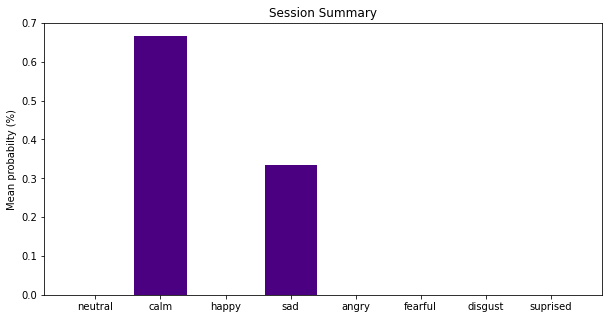

Emotions analyzed for: 32.3493 seconds


In [6]:
import wave
from array import array
import struct
import time

# Initialize variables
RATE = 24414
CHUNK = 512
RECORD_SECONDS = 9.98

FORMAT = pyaudio.paInt32
CHANNELS = 1
WAVE_OUTPUT_FILE = "output.wav"

# Open an input channel
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)


# Initialize a non-silent signals array to state "True" in the first 'while' iteration.
data = array('h', np.random.randint(size = 512, low = 0, high = 500))

# SESSION START
print("** session started")
total_predictions = [] # A list for all predictions in the session.
tic = time.perf_counter()

while is_silent(data) == False:
    print("* recording...")
    frames = [] 
    data = np.nan # Reset 'data' variable.

    timesteps = int(RATE / CHUNK * RECORD_SECONDS) # => 339

    # Insert frames to 'output.wav'.
    for i in range(0, timesteps):
        data = array('l', stream.read(CHUNK)) 
        frames.append(data)

        wf = wave.open(WAVE_OUTPUT_FILE, 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))

    print("* done recording")

    X = preprocessing(WAVE_OUTPUT_FILE) # 'output.wav' file preprocessing.
    # Model's prediction => an 8 emotion probabilities array.
    predictions = model.predict(X, use_multiprocessing=True)
    pred_list = list(predictions)
    pred_np = np.squeeze(np.array(pred_list).tolist(), axis=0) # Get rid of 'array' & 'dtype' statments.
    total_predictions.append(pred_np)
    
    max_emo = np.argmax(predictions)
    print('max emotion:', emotions.get(max_emo,-1))
    
    print(100*'-')

    # Define the last 2 seconds sequence.
    last_frames = np.array(struct.unpack(str(96 * CHUNK) + 'B', np.stack(( frames[-1], frames[-2], frames[-3], frames[-4],
                                                                            frames[-5], frames[-6], frames[-7], frames[-8],
                                                                            frames[-9], frames[-10], frames[-11], frames[-12],
                                                                            frames[-13], frames[-14], frames[-15], frames[-16],
                                                                            frames[-17], frames[-18], frames[-19], frames[-20],
                                                                            frames[-21], frames[-22], frames[-23], frames[-24]),
                                                                            axis =1)), dtype = 'b')
    if is_silent(last_frames): # If the last 2 seconds are silent, end the session.
        break

# SESSION END        
toc = time.perf_counter()
stream.stop_stream()
stream.close()
p.terminate()
wf.close()
print('** session ended')

# Present emotion distribution for the whole session.
total_predictions_np =  np.mean(np.array(total_predictions).tolist(), axis=0)
fig = plt.figure(figsize = (10, 5))
plt.bar(emo_list, total_predictions_np, color = 'indigo')
plt.ylabel("Mean probabilty (%)")
plt.title("Session Summary")
plt.show()

print(f"Emotions analyzed for: {(toc - tic):0.4f} seconds")